<a href="https://colab.research.google.com/github/JAXMES/Data-Analytics/blob/master/Bellabeat_Study_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Bellabeat, a high-tech company that manufactures health-focused smart products focused on women.
# Bellabeat study focuses on...
# Files URL: https://www.kaggle.com/datasets/arashnic/fitbit

# - Trends in smart device usage
# - How trends apply to Bellabeat customers and how it influences Bellabeat marketing strategy.

install.packages("tidyverse")
install.packages("ggplot2")

# Initialize libraries
library(tidyverse)  #helps wrangle data
library(lubridate)  #helps wrangle date attributes
library(ggplot2)  #helps visualize data

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: timechange


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [2]:
# 1. DATA COLLECTION
#===============================================

daily_activity <- read_csv("dailyActivity_merged.csv")
weight_logs <- read_csv("weightLogInfo_merged.csv")
sleep_day <- read_csv("sleepDay_merged.csv")

Rows: 940 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ActivityDate
dbl (14): Id, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 67 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Date
dbl (6): Id, WeightKg, WeightPounds, Fat, BMI, LogId
lgl (1): IsManualReport

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 413 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): SleepDay
dbl (4): Id, TotalSleepRecords, TotalMinutesAsleep, TotalTimeInBed

ℹ Use `spec()` to retrieve the full column specification fo

In [3]:
# 2. WRANGLE DATA
#===============================================


# Remove unnecessary columns from the dataframes
daily_activity[ , c('TrackerDistance', 'LoggedActivitiesDistance', 'VeryActiveDistance', 'LightActiveDistance', 'TotalDistance', 'SedentaryActiveDistance', 'ModeratelyActiveDistance')] <- list(NULL)
colnames(daily_activity)

weight_logs[ , c('WeightKg', 'Fat', 'IsManualReport', 'LogId')] <- list(NULL)
colnames(weight_logs)

sleep_day[ , c('TotalSleepRecords')] <- list(NULL)
colnames(sleep_day)

# Inspect the dataframes and look for irregularities
str(daily_activity)
str(weight_logs)
str(sleep_day)

[1] "Id"                   "ActivityDate"         "TotalSteps"          
[4] "VeryActiveMinutes"    "FairlyActiveMinutes"  "LightlyActiveMinutes"
[7] "SedentaryMinutes"     "Calories"

[1] "Id"           "Date"         "WeightPounds" "BMI"

[1] "Id"                 "SleepDay"           "TotalMinutesAsleep"
[4] "TotalTimeInBed"

spc_tbl_ [940 × 8] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Id                  : num [1:940] 1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDate        : chr [1:940] "4/12/2016" "4/13/2016" "4/14/2016" "4/15/2016" ...
 $ TotalSteps          : num [1:940] 13162 10735 10460 9762 12669 ...
 $ VeryActiveMinutes   : num [1:940] 25 21 30 29 36 38 42 50 28 19 ...
 $ FairlyActiveMinutes : num [1:940] 13 19 11 34 10 20 16 31 12 8 ...
 $ LightlyActiveMinutes: num [1:940] 328 217 181 209 221 164 233 264 205 211 ...
 $ SedentaryMinutes    : num [1:940] 728 776 1218 726 773 ...
 $ Calories            : num [1:940] 1985 1797 1776 1745 1863 ...
 - attr(*, "spec")=
  .. cols(
  ..   Id = col_double(),
  ..   ActivityDate = col_character(),
  ..   TotalSteps = col_double(),
  ..   TotalDistance = col_double(),
  ..   TrackerDistance = col_double(),
  ..   LoggedActivitiesDistance = col_double(),
  ..   VeryActiveDistance = col_double(),
  ..   ModeratelyActiveDistance = col_double(),
  ..   

In [4]:
# 3. CLEAN UP AND ADD DATA TO PREPARE FOR ANALYSIS
#=================================================

# Rename column ActivityDate & Sleep Day to Date for consistency
colnames(daily_activity)[colnames(daily_activity) == 'ActivityDate'] <- 'Date'
colnames(daily_activity)

colnames(sleep_day)[colnames(sleep_day) == 'SleepDay'] <- 'Date'
colnames(sleep_day)

# Exclude duplicates if any
daily_activity <- unique(daily_activity)
weight_logs <- unique(weight_logs)
sleep_day <- unique(sleep_day)


# Changing Date format and adding aggregations
daily_activity$Date <- as.Date(daily_activity$Date, format="%m/%d/%y")
class(daily_activity$Date)

daily_activity$Day_of_Week <- format(as.Date(daily_activity$Date), "%A")

# Sleep_day
sleep_day$Date <- as.Date(sleep_day$Date, format="%m/%d/%y")
class(sleep_day$Date)

sleep_day$Day_of_Week <- format(as.Date(sleep_day$Date), "%A")

# Weight
weight_logs$Date <- as.Date(weight_logs$Date, format="%m/%d/%y")
class(weight_logs$Date)

weight_logs$Day_of_Week <- format(as.Date(weight_logs$Date), "%A")

[1] "Id"                   "Date"                 "TotalSteps"          
[4] "VeryActiveMinutes"    "FairlyActiveMinutes"  "LightlyActiveMinutes"
[7] "SedentaryMinutes"     "Calories"

[1] "Id"                 "Date"               "TotalMinutesAsleep"
[4] "TotalTimeInBed"

[1] "Date"

[1] "Date"

[1] "Date"

In [5]:
# Descriptive analysis on Daily activities, sleep and weight

summary(daily_activity$TotalSteps)
summary(daily_activity$Calories)

summary(weight_logs$WeightPounds)


summary(sleep_day$TotalMinutesAsleep)
summary(sleep_day$TotalTimeInBed)

summary(weight_logs$BMI)

# BMI (BODY MASS INDEX): 
# Underweight | < 18.5
# Normal | 18.5-24.9
# Overweight | 25.0 - 29.0
# Obese | 30.0 - 40.0
# Extreme Obese | > 40

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0    3790    7406    7638   10727   36019 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0    1828    2134    2304    2793    4900 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  116.0   135.4   137.8   158.8   187.5   294.3 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   58.0   361.0   432.5   419.2   490.0   796.0 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   61.0   403.8   463.0   458.5   526.0   961.0 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  21.45   23.96   24.39   25.19   25.56   47.54 

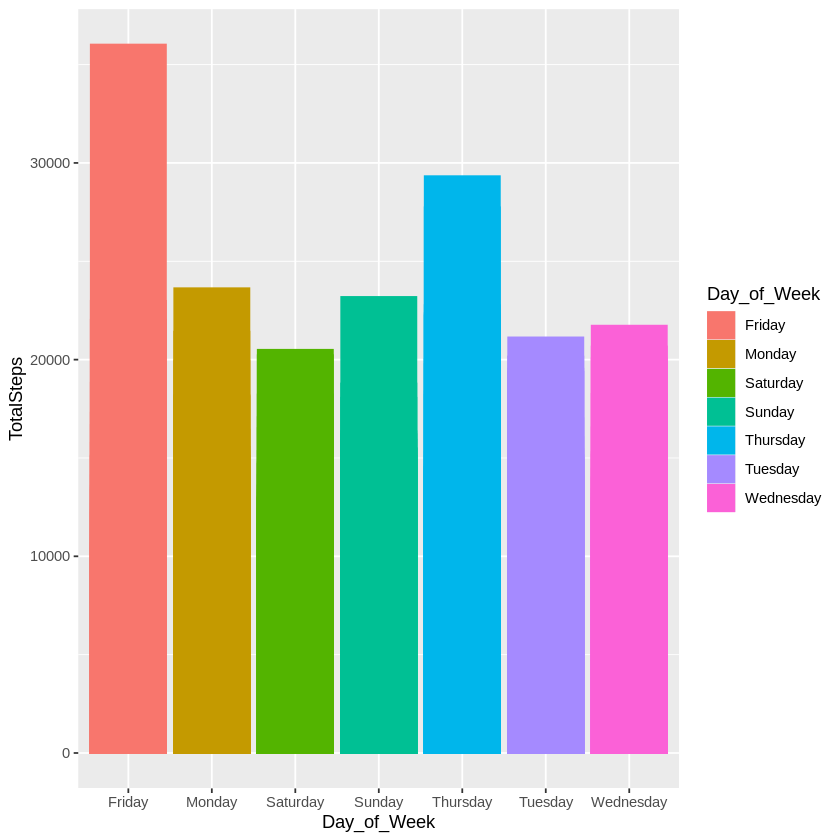

In [7]:
# Visualizations

# Weekdays daily activity pattern chart
daily_activity %>% 
  ggplot(aes(x = Day_of_Week, y = TotalSteps, fill=Day_of_Week, color=Day_of_Week)) + geom_col(position = "dodge")


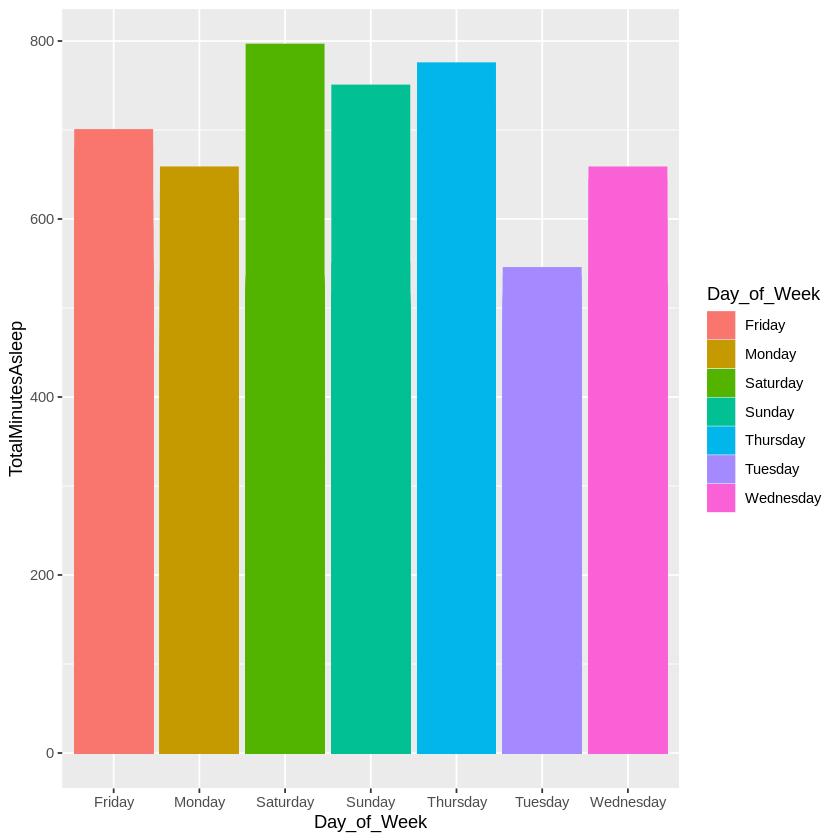

In [8]:
# Weekdays sleeping pattern chart
sleep_day %>% 
  ggplot(aes(x = Day_of_Week, y = TotalMinutesAsleep, fill=Day_of_Week, color=Day_of_Week)) + geom_col(position = "dodge")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


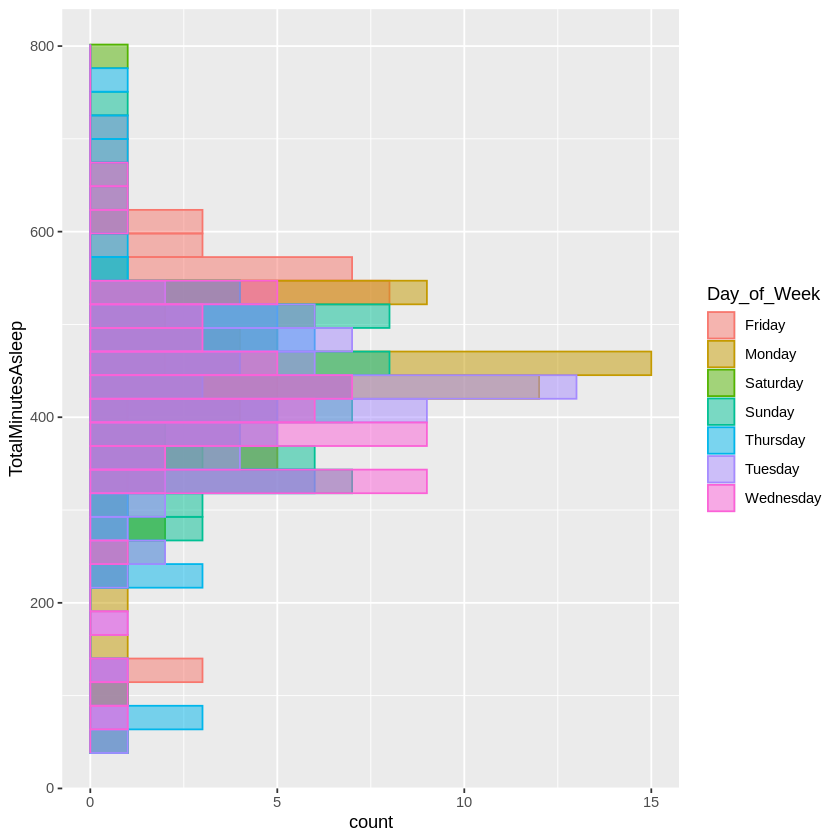

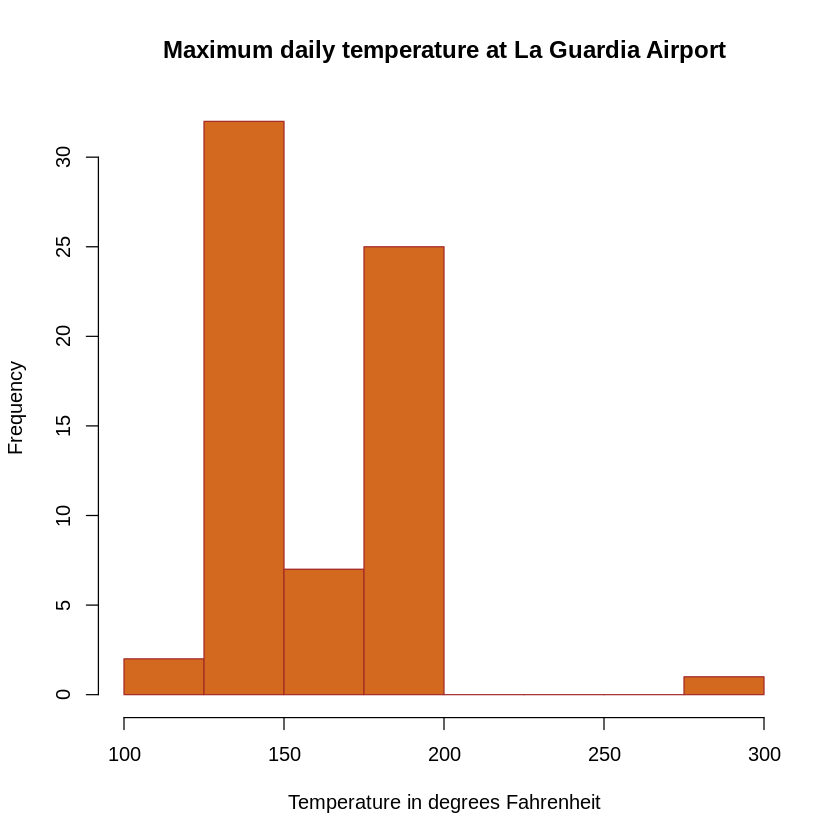

In [11]:
# Histogram for sleep in weekdays
sleep_day %>%
  ggplot(aes(y = TotalMinutesAsleep, fill= Day_of_Week, color=Day_of_Week)) +
    geom_histogram(position="identity", alpha=0.5)

# Histogram shows that most individuals are in a normal weight or slightly obese
hist(weight_logs$WeightPounds,
     main="Maximum daily temperature at La Guardia Airport",
     xlab="Temperature in degrees Fahrenheit",
     xlim=c(100,300),
     col="chocolate",
     border="brown",
     breaks=c(100,125,150,175,200,225,250,275,300)
)

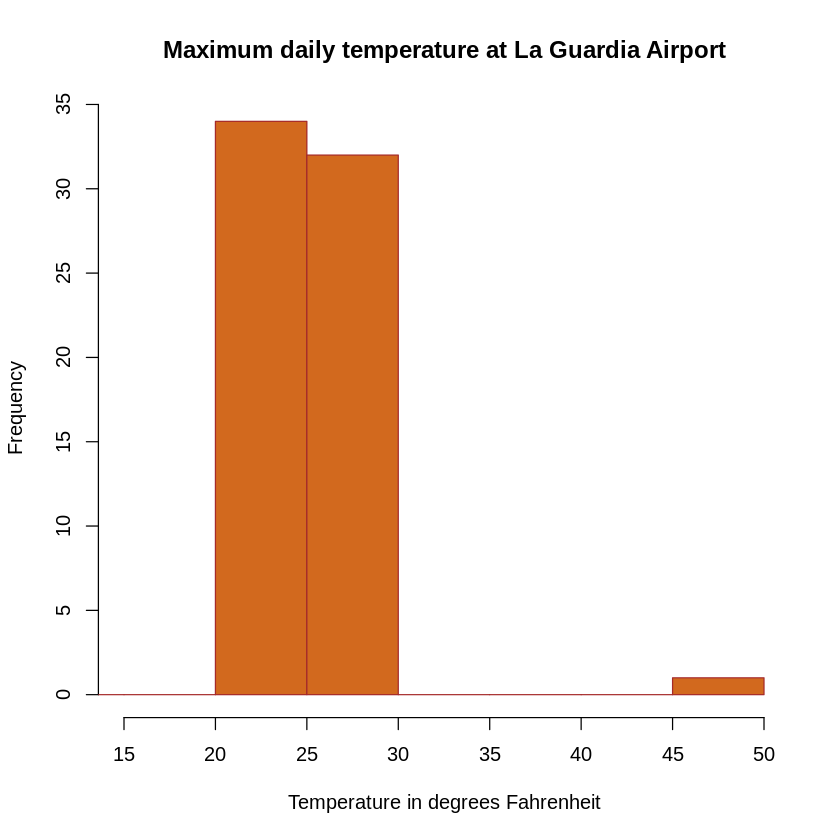

In [12]:
# Histogram based on BMI for weight clarification
hist(weight_logs$BMI,
     main="Maximum daily temperature at La Guardia Airport",
     xlab="Temperature in degrees Fahrenheit",
     xlim=c(15,50),
     col="chocolate",
     border="brown",
     breaks=c(10,15,20,25,30,35,40,45,50)
)

# We can use our findings to create targeted ads in the app either for sleep, weight or daily activities.